# Analysis of Mineral Facilities in the Middle East & Africa

## Objective
The objective of this project is to analyze mineral facility locations, production capacity, and
investment trends across the Middle East and Africa. The study will examine key minerals,
facility types, and ownership structures while identifying patterns in mining operations and
investments.

## Project Overview
Mining is a critical economic sector in the Middle East and Africa, contributing significantly to
GDP, employment, and exports. This project leverages data on mineral facilities, production
capacities, and investment activities to:

1.​ Analyze the Distribution of Mineral Facilities: Map mining operations across different
countries.

2.​ Examine Commodity Production Trends: Identify the most mined commodities and their
production capacity.

3.​ Assess Investment Patterns: Explore the role of main and other investors in mineral
facility operations.

4.​ Facility Status and Capacity Evaluation: Determine active vs. inactive facilities and their
production potential.

5.​ Recommendation: Based on your findings, provide suggestions on how governments
and policymakers can develop investment-friendly policies and improve mining
regulations. Additionally, recommend strategies for mining companies and investors to
identify high-potential sites for exploration and investment

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import folium

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

## Load data

In [15]:
import pandas as pd

# read file
df = pd.read_csv("data/Minfac.csv", encoding='ISO-8859-1')

# Show info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6478 entries, 0 to 6477
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   position    6478 non-null   int64  
 1   rec_id      6478 non-null   int64  
 2   year        6478 non-null   int64  
 3   country     6478 non-null   object 
 4   commodity   6478 non-null   object 
 5   location    5478 non-null   object 
 6   fac_name    4854 non-null   object 
 7   fac_type    6337 non-null   object 
 8   dmslat      5685 non-null   object 
 9   dmslong     5686 non-null   object 
 10  latitude    6478 non-null   float64
 11  longitude   6478 non-null   float64
 12  precision   4120 non-null   object 
 13  mm          1190 non-null   object 
 14  op_comp     5878 non-null   object 
 15  maininvest  1551 non-null   object 
 16  othinvest   306 non-null    object 
 17  status      6478 non-null   object 
 18  capacity    6014 non-null   object 
 19  units       6144 non-null  

## Understand the data

In [16]:
df.head()

,position,rec_id,year,country,commodity,location,fac_name,fac_type,dmslat,dmslong,...,precision,mm,op_comp,maininvest,othinvest,status,capacity,units,notes,cite
0,1,1,2007,Australia,Alumina,"Gladstone, Queensland",Gladstone alumina refinery,Plant,24° 09' S,151° 13' E,...,F,NaN,"Queensland Alumina Ltd., operator","Rio Tinto Alcan, 80%","Rusal, 20%",Active,3850,thousand metric tons per year,NaN,847
1,2,2,2007,Australia,Alumina,"Nhulunbuy, Gove, Northern Territory",Gove alumina refinery,Plant,13° 48' S,136° 44' E,...,F,NaN,Alcan Gove Pty. Ltd.,"Rio Tinto plc, 100%",NaN,Active,3800,thousand metric tons per year,NaN,847
2,3,3,2007,Australia,Alumina,"20 kilometers northwest of Collie, Western Aus...",Worsley alumina refinery,Plant,34° 46' S,116° 04' E,...,F,NaN,"Worsley Alumina Pty. Ltd., manager","BHP Billiton Ltd., 86%",Japan Alumina Associates (Australia) Pty. Ltd....,Active,3700,thousand metric tons per year,NaN,847
3,4,4,2007,Australia,Alumina,"Pinjarra, Western Australia",Pinjarra alumina refinery,Plant,33° 22' S,115° 55' E,...,F,NaN,Alcoa World Alumina Australia,"Alcoa World Alumina Australia, 100%",NaN,Active,3400,thousand metric tons per year,NaN,847
4,5,5,2007,Australia,Alumina,"Waroona, Western Australia",Wagerup alumina refinery,Plant,33° 05' S,115° 55' E,...,F,NaN,Alcoa World Alumina Australia,"Alcoa World Alumina Australia, 60%","Western Mining Corp., 40%",Active,2600,thousand metric tons per year,NaN,847


In [17]:
df.info

<bound method DataFrame.info of       position  rec_id  year         country       commodity  \
0            1       1  2007       Australia         Alumina   
1            2       2  2007       Australia         Alumina   
2            3       3  2007       Australia         Alumina   
3            4       4  2007       Australia         Alumina   
4            5       5  2007       Australia         Alumina   
...        ...     ...   ...             ...             ...   
6473      1589    6616  2003        Zimbabwe             tin   
6474      1590    6617  2003        Zimbabwe           Steel   
6475      1591    6618  2003        Zimbabwe     vermiculite   
6476      1592    6619  2003        Zimbabwe     vermiculite   
6477      1593    6620  2003  Western Sahara  phosphate rock   

                                               location  \
0                                 Gladstone, Queensland   
1                   Nhulunbuy, Gove, Northern Territory   
2     20 kilometers no

In [18]:
df.describe(include='all')


,position,rec_id,year,country,commodity,location,fac_name,fac_type,dmslat,dmslong,...,precision,mm,op_comp,maininvest,othinvest,status,capacity,units,notes,cite
count,6478.000000,6478.000000,6478.000000,6478,6478,5478,4854,6337,5685,5686,...,4120,1190,5878,1551,306,6478,6014,6144,2239,6478.000000
unique,NaN,NaN,NaN,167,670,4043,4214,21,3037,3590,...,2,4,3470,771,189,8,1445,54,459,NaN
top,NaN,NaN,NaN,Russia,Cement,North Sea,Point Lisas Industrial Estate,Plant,56° 33' N,003° 05' E,...,F,S,Private owner,"Government of India, 100%","Private investors, 12.3%",Active,0,thousand metric tons per year,­­,NaN
freq,NaN,NaN,NaN,343,570,31,12,2802,29,29,...,2449,752,45,45,13,5018,228,3071,708,NaN
mean,710.233097,3255.069157,2005.751158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,848.983174
std,453.329849,1893.334855,1.677709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.453152
min,1.000000,1.000000,2003.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,847.000000
25%,332.000000,1620.250000,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,848.000000
50%,657.000000,3239.500000,2007.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,849.000000
75%,1057.000000,4858.750000,2007.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,850.000000


In [19]:
df["commodity"].nunique()

670

In [20]:
df["country"].nunique()

167

In [21]:
df["fac_type"].nunique()

21

In [22]:
df.isnull().sum()

position         0
rec_id           0
year             0
country          0
commodity        0
location      1000
fac_name      1624
fac_type       141
dmslat         793
dmslong        792
latitude         0
longitude        0
precision     2358
mm            5288
op_comp        600
maininvest    4927
othinvest     6172
status           0
capacity       464
units          334
notes         4239
cite             0
dtype: int64

## Data cleaning

In [23]:
# Convert columns
df['capacity'] = pd.to_numeric(df['capacity'], errors='coerce')
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

# Strip whitespace from string columns
string_columns = ['country', 'commodity', 'location', 'fac_name', 'fac_type', 
                  'op_comp', 'maininvest', 'othinvest', 'status', 'units']
for col in string_columns:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()

# Drop rows without coordinates
df = df.dropna(subset=['latitude', 'longitude'])

print("Cleaned dataset shape:", df.shape)

Cleaned dataset shape: (6478, 22)


## General analysis (Globally)

In [24]:
# Top 15 countries by facility count
country_dist = df['country'].value_counts().head(15)
print(country_dist)

# Facility types
facility_types = df['fac_type'].value_counts()
print(facility_types)

# Year distribution
if 'year' in df.columns:
    year_dist = df['year'].value_counts().sort_index()
    print(year_dist)


country
Russia          343
Australia       296
China           250
Iran            229
Germany         212
India           188
South Africa    188
Brazil          187
Canada          173
Kazakhstan      132
Japan           130
Spain           128
Poland          128
Norway          106
Peru            102
Name: count, dtype: int64
fac_type
Plant                2802
Mine                 2709
Oil, Gas              313
nan                   141
Refinery              124
Smelter               115
Mill                   89
Field                  84
Mine, Plant            32
Quarry                 28
Mill, Kiln             11
Mill (rolling)          6
Refinery, Smelter       6
Block, Field            4
Mine, Refinery          3
Plant, Refinery         2
Mine (offshore)         2
Well                    2
Plant (brine)           2
Salt Pond               1
Field (oil)             1
Field (gas)             1
Name: count, dtype: int64
year
2003    1451
2004     225
2005     681
2006     309
20

In [25]:
# Top commodities
commodity_counts = df['commodity'].value_counts().head(15)
print(commodity_counts)

# Capacity by commodity
capacity_by_commodity = df.groupby('commodity')['capacity'].agg(['count', 'sum', 'mean', 'median']).sort_values('sum', ascending=False).head(15)
capacity_by_commodity.columns = ['Facility_Count', 'Total_Capacity', 'Avg_Capacity', 'Median_Capacity']
print(capacity_by_commodity)

# Units
units_dist = df['units'].value_counts()
print(units_dist)


commodity
Cement                         570
cement                         207
Iron and steel: crude steel    203
Gold                           188
Petroleum: crude               159
Petroleum: refined             147
Aluminum                       144
Copper                         120
Coal                           109
Natural gas                    107
gold                           101
Iron and steel: iron ore        74
Limestone                       73
Silver                          71
Coal: black                     68
Name: count, dtype: int64
                              Facility_Count  Total_Capacity  Avg_Capacity  \
commodity                                                                    
Diamond                                    7     11406300.00  1.629471e+06   
Copper                                   103      7025942.80  6.821304e+04   
Petroleum: refinery products              38      7024675.00  1.848599e+05   
Silver                                    61     

In [26]:
# Top main investors
main_investors = df['maininvest'].value_counts().head(20)
print(main_investors)

# Top operating companies
operating_companies = df['op_comp'].value_counts().head(20)
print(operating_companies)

# Unique investors by country
country_investors = df.groupby('country')['maininvest'].nunique().sort_values(ascending=False).head(15)
print(country_investors)

# Unique investors by commodity
commodity_investors = df.groupby('commodity')['maininvest'].nunique().sort_values(ascending=False).head(15)
print(commodity_investors)


maininvest
nan                                                           4927
Government of India, 100%                                       45
Government, 100%                                                21
Unocal Thailand Ltd.                                            19
BHP Billiton Ltd., 100%                                         18
SUAL Group                                                      13
Kyrgyzazmunayzat                                                13
Bangladesh Oil, Gas, and Mineral Corp. (Petrobangla), 100%      12
ENRC                                                            12
Xstrata plc, 100%                                               11
Eliopoulos-Kyriakopoulos Group                                  11
RAG Aktiengesellschaft, 100%                                    11
ExxonMobil Corp., 50%                                           11
Aluminum Corporation of China (Chinalco)                        11
Government of Indonesia, 65%                       

In [27]:
# Status distribution
status_dist = df['status'].value_counts()
print(status_dist)

# Capacity by status
capacity_by_status = df.groupby('status')['capacity'].agg(['count', 'sum', 'mean', 'median']).fillna(0)
capacity_by_status.columns = ['Facility_Count', 'Total_Capacity', 'Avg_Capacity', 'Median_Capacity']
print(capacity_by_status)

# Status by country
status_by_country = pd.crosstab(df['country'], df['status']).head(15)
print(status_by_country)

# High capacity facilities (top 10%)
threshold = df['capacity'].quantile(0.9)
high_capacity_facilities = df[df['capacity'] >= threshold]
print("Top 10% capacity threshold:", threshold)
print("High-capacity facilities:", high_capacity_facilities.shape[0])


status
Active                5018
active                1391
closed                  60
Inactive                 4
Under development        2
Under Construction       1
Planned                  1
Under construction       1
Name: count, dtype: int64
                    Facility_Count  Total_Capacity  Avg_Capacity  \
status                                                             
Active                        4237    7.966164e+07  18801.424800   
Inactive                         2    5.100000e+02    255.000000   
Planned                          1    3.900000e+03   3900.000000   
Under Construction               0    0.000000e+00      0.000000   
Under construction               0    0.000000e+00      0.000000   
Under development                2    9.000000e+02    450.000000   
active                         344    1.036870e+05    301.415698   
closed                           2    7.550000e+02    377.500000   

                    Median_Capacity  
status                          

## Filter Middle East and African Countries

In [28]:
middle_east = ['Bahrain', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 
               'Oman', 'Qatar', 'Saudi Arabia', 'Syria', 'United Arab Emirates', 'Yemen', 'Egypt']
africa = ['Algeria', 'Angola', 'Botswana', 'Cameroon', 'Congo', 'Egypt', 'Ghana', 
          'Libya', 'Morocco', 'Mozambique', 'Nigeria', 'South Africa', 'Sudan', 'Tanzania', 'Zambia', 'Zimbabwe']  # Add all African nations
target_countries = list(set(middle_east + africa))

In [29]:
df_mea = df[df['country'].isin(target_countries)]

In [30]:
df_mea

,position,rec_id,year,country,commodity,location,fac_name,fac_type,dmslat,dmslong,...,precision,mm,op_comp,maininvest,othinvest,status,capacity,units,notes,cite
5027,1,5028,2003,Algeria,ammonia,"Alzofert, Arzew",nan,Plant,"35° 51' 06""","000° 19' 17""",...,NaN,NaN,Le groupe ASMIDAL,nan,nan,closed,NaN,t / yr,NaN,851
5028,2,5029,2003,Algeria,ammonia,"Fertial, Annaba",nan,Plant,"36° 54' 00""","007° 46' 00""",...,NaN,NaN,Le groupe ASMIDAL,nan,nan,active,NaN,t / yr,NaN,851
5029,4,5031,2003,Algeria,gold,Tirek,nan,Mine,NaN,NaN,...,NaN,S,Enterprise D'Exploitation des Mines D'or (ENOR),nan,nan,active,800.0,t / yr,NaN,851
5030,5,5032,2003,Algeria,barite,"Ain Mimoun, Boucaid, Mellal",nan,Mine,"35° 53' 28""","001° 37' 11""",...,NaN,NaN,Société des Mines de Baryte d'Algérie s.p.a. (...,nan,nan,active,NaN,t / yr,NaN,851
5031,6,5033,2003,Algeria,bentonite,"Maghnia, M'Zila areas",nan,Quarry,"34° 50' 50""","001° 43' 43""",...,NaN,S,Société des Bentonites d'Algérie s.p.a. (Entre...,nan,nan,active,NaN,t / yr,NaN,851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6472,1588,6615,2003,Zimbabwe,platinum group metals,Mimosa,nan,Mine,NaN,NaN,...,NaN,NaN,Zimbabwe Mining and Smelting Co. (Pvt.) Ltd.,nan,nan,active,NaN,kg / yr,NaN,851
6473,1589,6616,2003,Zimbabwe,tin,Kamativi,nan,Mine,NaN,NaN,...,NaN,"S,U",artisanal,nan,nan,active,NaN,t / yr,NaN,851
6474,1590,6617,2003,Zimbabwe,Steel,Redcliff,nan,Plant,NaN,NaN,...,NaN,NaN,Zimbabwe Iron and Steel Co. (ZISCO),nan,nan,active,NaN,t / yr,NaN,851
6475,1591,6618,2003,Zimbabwe,vermiculite,"Dinidza, Dorowa",nan,Mine,NaN,NaN,...,NaN,S,Dinidza Vermiculite Mining Co. (Pvt.) Ltd.,nan,nan,active,NaN,t / yr,NaN,851


In [33]:
df_mea.to_csv("MEA_Mineral_Facilities.csv", index=False)

## Inspect MEA data

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('MEA_Mineral_Facilities.csv')
df.info

<bound method DataFrame.info of       position  rec_id  year   country              commodity  \
0            1    5028  2003   Algeria                ammonia   
1            2    5029  2003   Algeria                ammonia   
2            4    5031  2003   Algeria                   gold   
3            5    5032  2003   Algeria                 barite   
4            6    5033  2003   Algeria              bentonite   
...        ...     ...   ...       ...                    ...   
1054      1588    6615  2003  Zimbabwe  platinum group metals   
1055      1589    6616  2003  Zimbabwe                    tin   
1056      1590    6617  2003  Zimbabwe                  Steel   
1057      1591    6618  2003  Zimbabwe            vermiculite   
1058      1592    6619  2003  Zimbabwe            vermiculite   

                         location  fac_name fac_type        dmslat  \
0                 Alzofert, Arzew       NaN    Plant  35° 51' 06"    
1                 Fertial, Annaba       NaN    

## Distribution of facilities by country

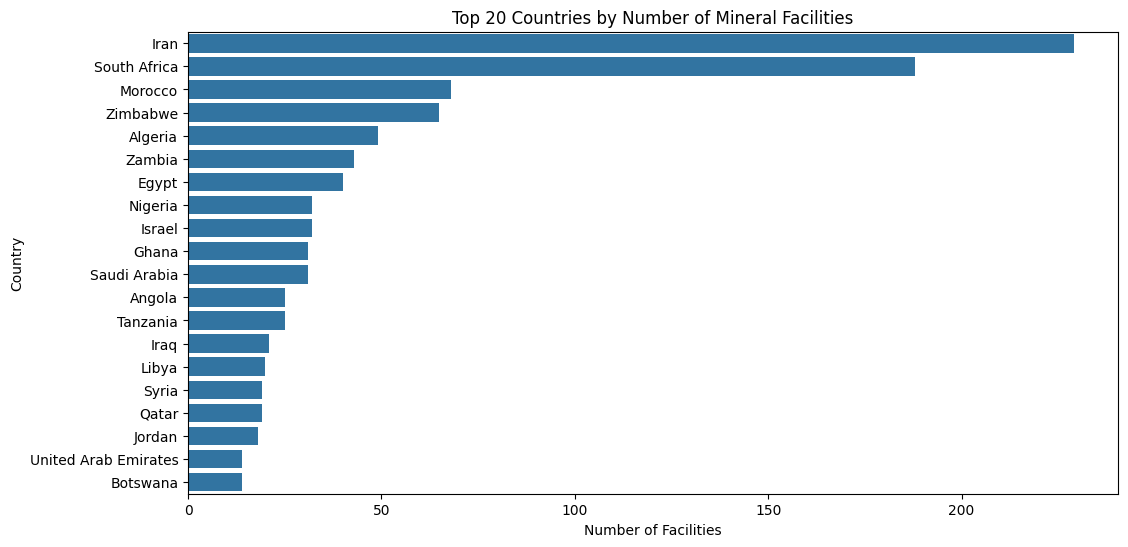

In [36]:
# Distribution of facilities by country
plt.figure(figsize=(12, 6))
country_counts = df['country'].value_counts().head(20)
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title('Top 20 Countries by Number of Mineral Facilities')
plt.xlabel('Number of Facilities')
plt.ylabel('Country')
plt.show()

## Identify top commodities

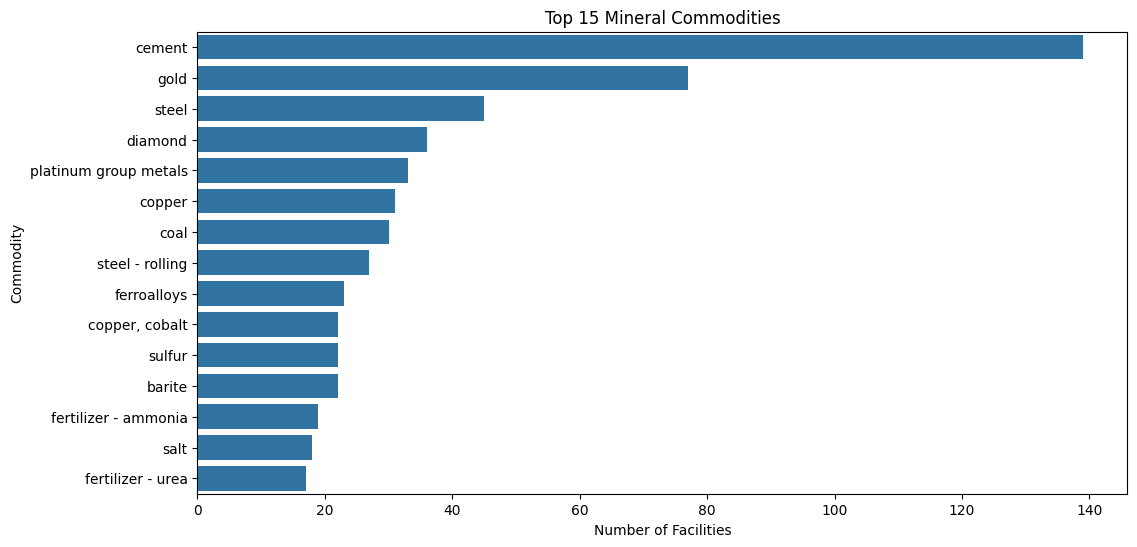

In [37]:
# Most common commodities
plt.figure(figsize=(12, 6))
commodity_counts = df['commodity'].value_counts().head(15)
sns.barplot(x=commodity_counts.values, y=commodity_counts.index)
plt.title('Top 15 Mineral Commodities')
plt.xlabel('Number of Facilities')
plt.ylabel('Commodity')
plt.show()

## Investment pattern Analysis

In [38]:
# Fill missing values in maininvest and othinvest with 'Unknown'
df['maininvest'] = df['maininvest'].fillna('Unknown')
df['othinvest'] = df['othinvest'].fillna('Unknown')

# Normalize investor names by stripping whitespace
df['maininvest'] = df['maininvest'].str.strip()
df['othinvest'] = df['othinvest'].str.strip()

# Exploratory Data Analysis (EDA)

# Count unique main and other investors
unique_main_investors = df['maininvest'].nunique()
unique_oth_investors = df['othinvest'].nunique()

print(f"Unique main investors: {unique_main_investors}")
print(f"Unique other investors: {unique_oth_investors}")




Unique main investors: 1
Unique other investors: 1


In [39]:
# Number of facilities per main investor
main_investor_counts = df['maininvest'].value_counts().head(20)
print("Top 20 main investors by number of facilities:")
print(main_investor_counts)





Top 20 main investors by number of facilities:
maininvest
Unknown    1059
Name: count, dtype: int64


In [40]:
# Number of facilities per other investor
oth_investor_counts = df['othinvest'].value_counts().head(20)
print("Top 20 other investors by number of facilities:")
print(oth_investor_counts)

Top 20 other investors by number of facilities:
othinvest
Unknown    1059
Name: count, dtype: int64


In [41]:
# Facility status distribution by main investor (top 10)
top_main_investors = main_investor_counts.index[:10]
status_by_main_investor = df[df['maininvest'].isin(top_main_investors)].groupby(['maininvest', 'status']).size().unstack(fill_value=0)

print("Facility status distribution for top 10 main investors:")
print(status_by_main_investor)



Facility status distribution for top 10 main investors:
status      active  closed
maininvest                
Unknown       1011      48


Top 20 main investors by total capacity:
maininvest
Unknown    84443.0
Name: capacity_num, dtype: float64


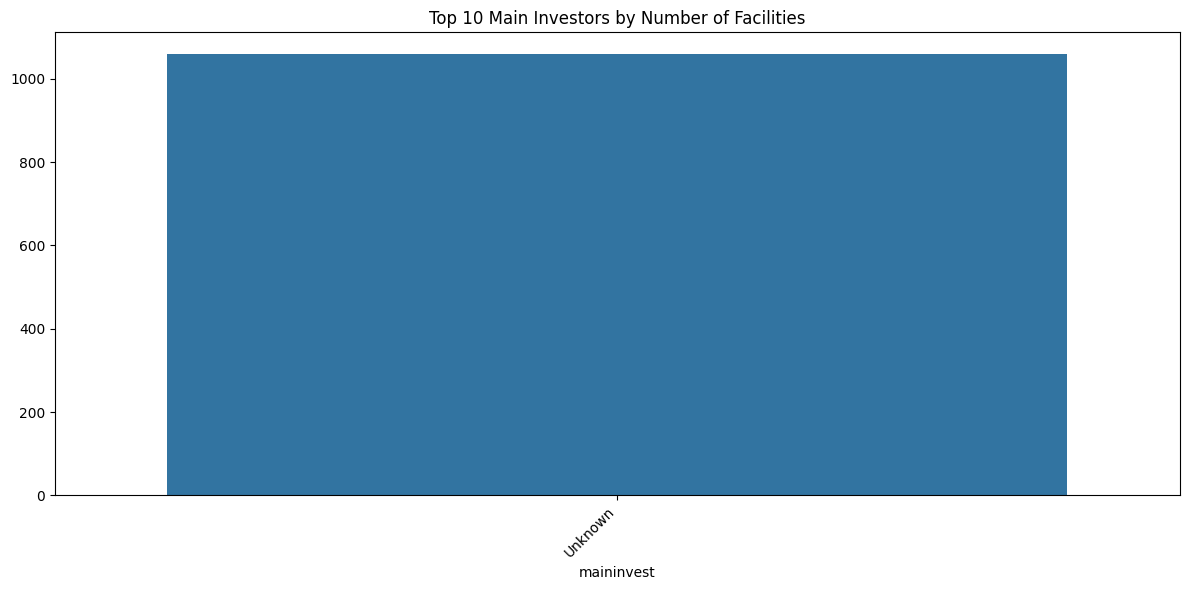

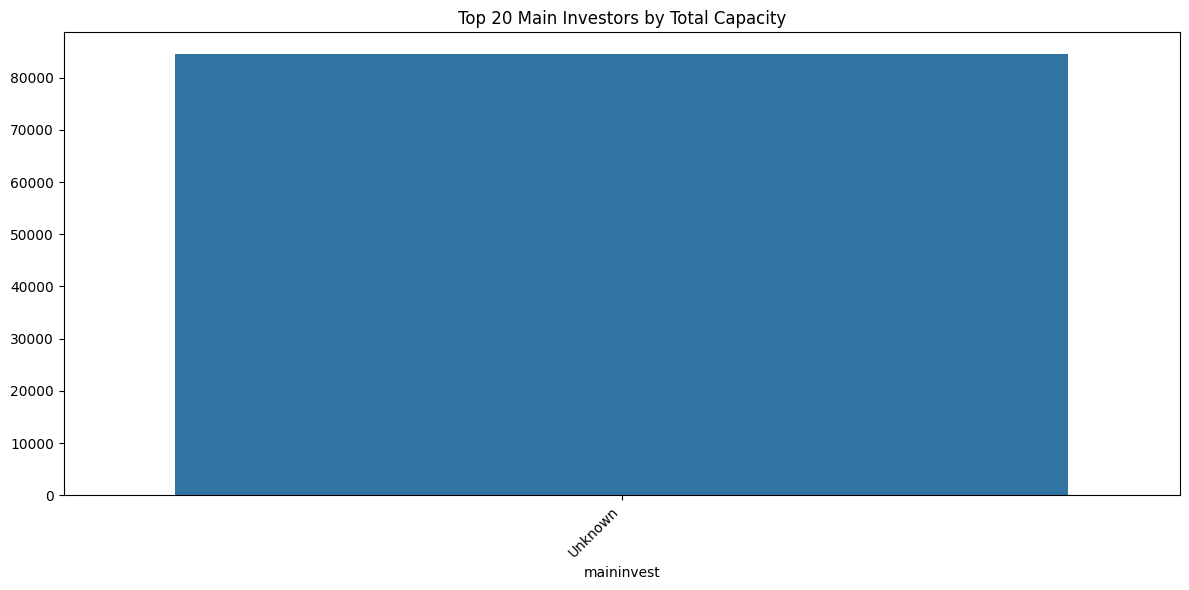

In [42]:
# Commodity types by main investor
commodity_by_main_investor = df.groupby(['maininvest', 'commodity']).size().unstack(fill_value=0)
# Capacity analysis by main investor
# Convert capacity to numeric (remove commas and handle errors)
df['capacity_num'] = pd.to_numeric(df['capacity'], errors='coerce')

capacity_by_main_investor = df.groupby('maininvest')['capacity_num'].sum().sort_values(ascending=False).head(20)
print("Top 20 main investors by total capacity:")
print(capacity_by_main_investor)

# Commodity types by main investor
commodity_by_main_investor = df.groupby(['maininvest', 'commodity']).size().unstack(fill_value=0)

# Visualization

plt.figure(figsize=(12, 6))
sns.barplot(x=main_investor_counts.index[:10], y=main_investor_counts.values[:10])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Main Investors by Number of Facilities')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=capacity_by_main_investor.index, y=capacity_by_main_investor.values)
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Main Investors by Total Capacity')
plt.tight_layout()
plt.show()


## Status of the facilities

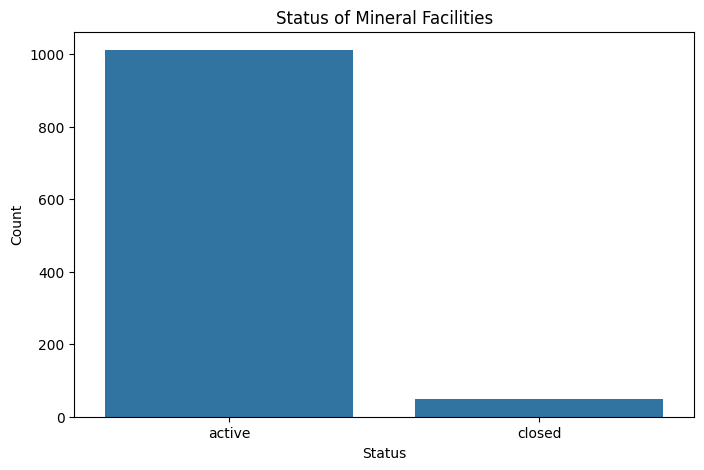

status
active    1011
closed      48
Name: count, dtype: int64

In [44]:
# Status of facilities
plt.figure(figsize=(8, 5))
status_counts = df['status'].value_counts()
sns.barplot(x=status_counts.index, y=status_counts.values)
plt.title('Status of Mineral Facilities')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()
status_counts